# Generate TIFF Reference File

In [ ]:
import glob
import logging
from tempfile import TemporaryDirectory

import dask
import fsspec
import numpy as np
import pandas as pd
import rioxarray
import s3fs
import ujson
import xarray as xr
import xrefcoord  # noqa
from distributed import Client
from kerchunk.combine import MultiZarrToZarr
from kerchunk.tiff import tiff_to_zarr
from tqdm import tqdm

In [54]:
# # URL pointing to a single GeoTIFF file
# url = "s3://sentinel-cogs/sentinel-s2-l2a-cogs/44/P/MT/2022/5/S2A_44PMT_20220505_0_L2A/B12.tif"

# # Initialize a s3 filesystem
# fs = s3fs.S3FileSystem(anon=True)

# xds = rioxarray.open_rasterio(fs.open(url))

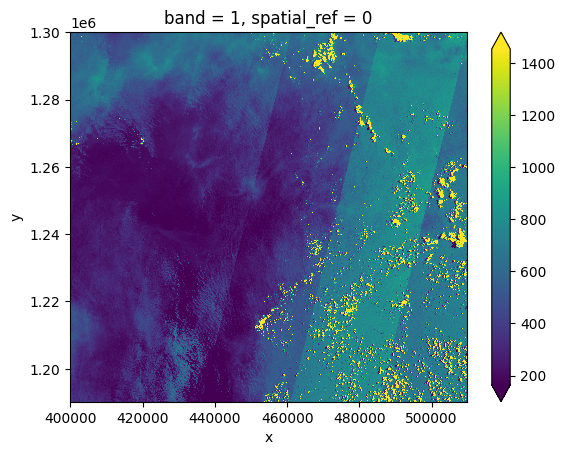

In [55]:
# xds.plot(robust=True)

In [56]:
# fs_read = fsspec.filesystem("s3", anon=True, skip_instance_cache=True)

# files_paths = fs_read.glob(
# "s3://sentinel-cogs/sentinel-s2-l2a-cogs/44/P/MT/2022/5/*/B12.tif"
# )
# file_pattern = sorted(["s3://" + f for f in files_paths])

# so = dict(mode="rb", anon=True, default_fill_cache=False, default_cache_type="first")


# td = TemporaryDirectory()
# temp_dir = td.name

# client = Client(n_workers=8, silence_logs=logging.ERROR)
# client


# def generate_json_reference(fil, output_dir: str):
#     tiff_chunks = tiff_to_zarr(fil, remote_options={"protocol": "s3", "anon": True})
#     fname = fil.split("/")[-2].split('_')[2] + '.json'

#     outf = f"{output_dir}/{fname}.json"
#     with open(outf, "wb") as f:
#         f.write(ujson.dumps(tiff_chunks).encode())
#     return outf


# tasks = [dask.delayed(generate_json_reference)(fil, temp_dir) for fil in file_pattern]

# dask.compute(tasks)

# ref_files = sorted(glob.iglob(f"{temp_dir}/*.json"))


# def fn_to_time(index, fs, var, fn):
#     import datetime
#     import re

#     subst = fn.split("/")[-1].split(".json")[0]
#     return datetime.datetime.strptime(subst, "%Y%m%d")


# mzz = MultiZarrToZarr(
#     path=ref_files,
#     indicts=ref_files,
#     remote_protocol="s3",
#     remote_options={"anon": True},
#     coo_map={"time": fn_to_time},
#     coo_dtypes={"time": np.dtype("M8[s]")},
#     concat_dims=["time"],
#     identical_dims=["x", "y"],
# )

# multi_kerchunk = mzz.translate()

# output_fname = "references/sentinel_b12.json"
# with open(f"{output_fname}", "wb") as f:
#     f.write(ujson.dumps(multi_kerchunk).encode())

/Users/nrhagen/opt/anaconda3/envs/install/envs/xrefcoord/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 51200 instead
  warnings.warn(


In [57]:
fs = fsspec.filesystem(
    "reference",
    fo="references/sentinel_b12.json",
    remote_protocol="s3",
    remote_options={"anon": True},
    skip_instance_cache=True,
)
m = fs.get_mapper("")
ds = xr.open_dataset(m, engine="zarr")

/var/folders/mb/7d7yq_4j2qgdfm_j3j4tsyl40000gn/T/ipykernel_79673/4145011781.py:9: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_dataset(m, engine="zarr")


In [58]:
ds

<xarray.Dataset>
Dimensions:  (time: 6, Y: 5490, X: 5490, Y1: 2745, X1: 2745, Y2: 1373,
              X2: 1373, Y3: 687, X3: 687, Y4: 344, X4: 344)
Coordinates:
  * time     (time) datetime64[s] 2022-05-05 2022-05-10 ... 2022-05-30
Dimensions without coordinates: Y, X, Y1, X1, Y2, X2, Y3, X3, Y4, X4
Data variables:
    0        (time, Y, X) float32 ...
    1        (time, Y1, X1) float32 ...
    2        (time, Y2, X2) float32 ...
    3        (time, Y3, X3) float32 ...
    4        (time, Y4, X4) float32 ...
Attributes: (12/14)
    multiscales:             [{'datasets': [{'path': '0'}, {'path': '1'}, {'p...
    OVR_RESAMPLING_ALG:      AVERAGE
    KeyDirectoryVersion:     1
    KeyRevision:             1
    KeyRevisionMinor:        0
    GTModelTypeGeoKey:       1
    ...                      ...
    GeogCitationGeoKey:      WGS 84
    GeogAngularUnitsGeoKey:  9102
    ProjectedCSTypeGeoKey:   32644
    ProjLinearUnitsGeoKey:   9001
    ModelPixelScale:         [20.0, 20.0, 0.0]
    ModelTiepoint:           [0.0, 0.0, 0.0, 399960.0, 1300020.0, 0.0]

In [40]:
import fsspec
import rioxarray
import s3fs
import ujson
import xarray as xr
import xrefcoord  # noqa
from kerchunk.tiff import tiff_to_zarr


import imagecodecs.numcodecs

imagecodecs.numcodecs.register_codecs()

numcodec 'imagecodecs_aec' already registered
numcodec 'imagecodecs_apng' already registered
numcodec 'imagecodecs_avif' already registered
numcodec 'imagecodecs_bitorder' already registered
numcodec 'imagecodecs_bitshuffle' already registered
numcodec 'imagecodecs_blosc' already registered
numcodec 'imagecodecs_blosc2' already registered
numcodec 'imagecodecs_brotli' already registered
numcodec 'imagecodecs_byteshuffle' already registered
numcodec 'imagecodecs_bz2' already registered
numcodec 'imagecodecs_cms' already registered
numcodec 'imagecodecs_deflate' already registered
numcodec 'imagecodecs_delta' already registered
numcodec 'imagecodecs_float24' already registered
numcodec 'imagecodecs_floatpred' already registered
numcodec 'imagecodecs_gif' already registered
numcodec 'imagecodecs_heif' already registered
numcodec 'imagecodecs_jetraw' already registered
numcodec 'imagecodecs_jpeg' already registered
numcodec 'imagecodecs_jpeg2k' already registered
numcodec 'imagecodecs_jpeg

In [44]:
fs = fsspec.filesystem(
    "reference",
    fo="references/sentinel.json",
    remote_protocol="s3",
    remote_options={"anon": True},
    skip_instance_cache=True,
)
m = fs.get_mapper("")
ds = xr.open_dataset(m, engine="zarr", consolidated=False)

In [45]:
ds

<xarray.Dataset>
Dimensions:  (time: 6, Y: 1830, X: 1830, Y1: 915, X1: 915, Y2: 458, X2: 458,
              Y3: 229, X3: 229)
Coordinates:
  * time     (time) datetime64[s] 2022-05-05 2022-05-10 ... 2022-05-30
Dimensions without coordinates: Y, X, Y1, X1, Y2, X2, Y3, X3
Data variables:
    0        (time, Y, X) float32 ...
    1        (time, Y1, X1) float32 ...
    2        (time, Y2, X2) float32 ...
    3        (time, Y3, X3) float32 ...
Attributes: (12/14)
    multiscales:             [{'datasets': [{'path': '0'}, {'path': '1'}, {'p...
    OVR_RESAMPLING_ALG:      MODE
    KeyDirectoryVersion:     1
    KeyRevision:             1
    KeyRevisionMinor:        0
    GTModelTypeGeoKey:       1
    ...                      ...
    GeogCitationGeoKey:      WGS 84
    GeogAngularUnitsGeoKey:  9102
    ProjectedCSTypeGeoKey:   32644
    ProjLinearUnitsGeoKey:   9001
    ModelPixelScale:         [60.0, 60.0, 0.0]
    ModelTiepoint:           [0.0, 0.0, 0.0, 399960.0, 1300020.0, 0.0]

In [59]:
dt = ds.xref.generate_multiscale_coords()

numcodec 'imagecodecs_aec' already registered
numcodec 'imagecodecs_apng' already registered
numcodec 'imagecodecs_avif' already registered
numcodec 'imagecodecs_bitorder' already registered
numcodec 'imagecodecs_bitshuffle' already registered
numcodec 'imagecodecs_blosc' already registered
numcodec 'imagecodecs_blosc2' already registered
numcodec 'imagecodecs_brotli' already registered
numcodec 'imagecodecs_byteshuffle' already registered
numcodec 'imagecodecs_bz2' already registered
numcodec 'imagecodecs_cms' already registered
numcodec 'imagecodecs_deflate' already registered
numcodec 'imagecodecs_delta' already registered
numcodec 'imagecodecs_float24' already registered
numcodec 'imagecodecs_floatpred' already registered
numcodec 'imagecodecs_gif' already registered
numcodec 'imagecodecs_heif' already registered
numcodec 'imagecodecs_jetraw' already registered
numcodec 'imagecodecs_jpeg' already registered
numcodec 'imagecodecs_jpeg2k' already registered
numcodec 'imagecodecs_jpeg

In [60]:
dt

DataTree('None', parent=None)
├── DataTree('0')
│       Dimensions:  (time: 6, y: 5490, x: 5490)
│       Coordinates:
│         * time     (time) datetime64[s] 2022-05-05 2022-05-10 ... 2022-05-30
│         * x        (x) float64 4e+05 4e+05 4e+05 ... 5.097e+05 5.097e+05 5.098e+05
│         * y        (y) float64 1.3e+06 1.3e+06 1.3e+06 ... 1.19e+06 1.19e+06 1.19e+06
│       Data variables:
│           0        (time, y, x) float32 ...
│       Attributes: (12/14)
│           multiscales:             [{'datasets': [{'path': '0'}, {'path': '1'}, {'p...
│           OVR_RESAMPLING_ALG:      AVERAGE
│           KeyDirectoryVersion:     1
│           KeyRevision:             1
│           KeyRevisionMinor:        0
│           GTModelTypeGeoKey:       1
│           ...                      ...
│           GeogCitationGeoKey:      WGS 84
│           GeogAngularUnitsGeoKey:  9102
│           ProjectedCSTypeGeoKey:   32644
│           ProjLinearUnitsGeoKey:   9001
│           ModelPixelScale:         [20.0, 20.0, 0.0]
│           ModelTiepoint:           [0.0, 0.0, 0.0, 399960.0, 1300020.0, 0.0]
├── DataTree('1')
│       Dimensions:  (time: 6, y: 2745, x: 2745)
│       Coordinates:
│         * time     (time) datetime64[s] 2022-05-05 2022-05-10 ... 2022-05-30
│         * x        (x) float64 4e+05 4e+05 4e+05 ... 4.548e+05 4.548e+05 4.548e+05
│         * y        (y) float64 1.3e+06 1.3e+06 1.3e+06 ... 1.245e+06 1.245e+06
│       Data variables:
│           1        (time, y, x) float32 ...
│       Attributes: (12/14)
│           multiscales:             [{'datasets': [{'path': '0'}, {'path': '1'}, {'p...
│           OVR_RESAMPLING_ALG:      AVERAGE
│           KeyDirectoryVersion:     1
│           KeyRevision:             1
│           KeyRevisionMinor:        0
│           GTModelTypeGeoKey:       1
│           ...                      ...
│           GeogCitationGeoKey:      WGS 84
│           GeogAngularUnitsGeoKey:  9102
│           ProjectedCSTypeGeoKey:   32644
│           ProjLinearUnitsGeoKey:   9001
│           ModelPixelScale:         [20.0, 20.0, 0.0]
│           ModelTiepoint:           [0.0, 0.0, 0.0, 399960.0, 1300020.0, 0.0]
├── DataTree('2')
│       Dimensions:  (time: 6, y: 1373, x: 1373)
│       Coordinates:
│         * time     (time) datetime64[s] 2022-05-05 2022-05-10 ... 2022-05-30
│         * x        (x) float64 4e+05 4e+05 4e+05 ... 4.274e+05 4.274e+05 4.274e+05
│         * y        (y) float64 1.3e+06 1.3e+06 1.3e+06 ... 1.273e+06 1.273e+06
│       Data variables:
│           2        (time, y, x) float32 ...
│       Attributes: (12/14)
│           multiscales:             [{'datasets': [{'path': '0'}, {'path': '1'}, {'p...
│           OVR_RESAMPLING_ALG:      AVERAGE
│           KeyDirectoryVersion:     1
│           KeyRevision:             1
│           KeyRevisionMinor:        0
│           GTModelTypeGeoKey:       1
│           ...                      ...
│           GeogCitationGeoKey:      WGS 84
│           GeogAngularUnitsGeoKey:  9102
│           ProjectedCSTypeGeoKey:   32644
│           ProjLinearUnitsGeoKey:   9001
│           ModelPixelScale:         [20.0, 20.0, 0.0]
│           ModelTiepoint:           [0.0, 0.0, 0.0, 399960.0, 1300020.0, 0.0]
├── DataTree('3')
│       Dimensions:  (time: 6, y: 687, x: 687)
│       Coordinates:
│         * time     (time) datetime64[s] 2022-05-05 2022-05-10 ... 2022-05-30
│         * x        (x) float64 4e+05 4e+05 4e+05 ... 4.136e+05 4.137e+05 4.137e+05
│         * y        (y) float64 1.3e+06 1.3e+06 1.3e+06 ... 1.286e+06 1.286e+06
│       Data variables:
│           3        (time, y, x) float32 ...
│       Attributes: (12/14)
│           multiscales:             [{'datasets': [{'path': '0'}, {'path': '1'}, {'p...
│           OVR_RESAMPLING_ALG:      AVERAGE
│           KeyDirectoryVersion:     1
│           KeyRevision:             1
│           KeyRevisionMinor:        0
│           GTModelTypeGeoKey:       1
│           ...                      ...
│ 

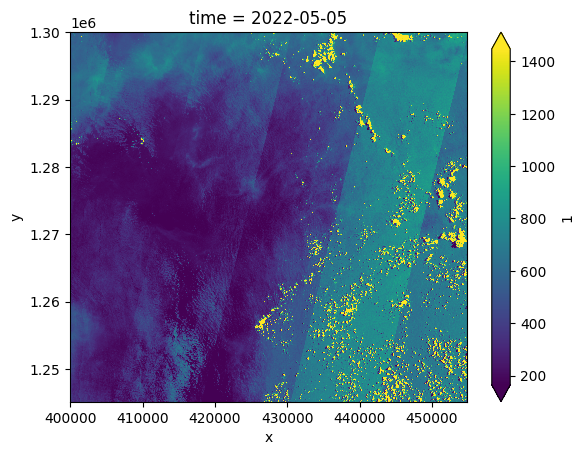

In [79]:
dt["1"].isel(time=0)["1"].plot(robust=True)

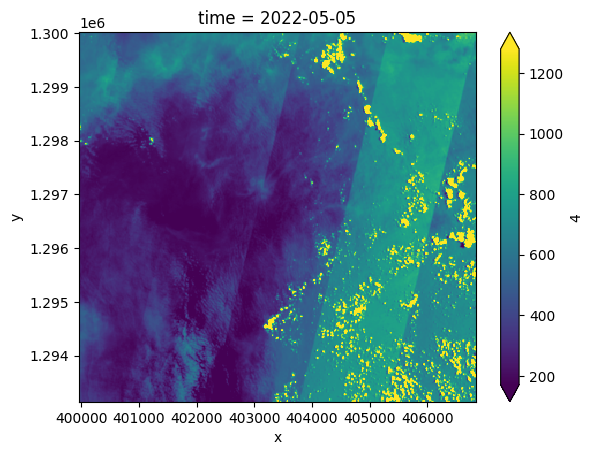

In [72]:
dt["4"].isel(time=0)["4"].plot(robust=True)